In [390]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [391]:
import numpy as np
import pandas as pd

In [392]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [393]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func



In [394]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [395]:
from sqlalchemy import MetaData
from sqlalchemy import Table

# Create MetaData instance
metadata = MetaData(engine, reflect=True)
metadata.tables


/Users/jessegray/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SADeprecationWarning: reflect=True is deprecate; please use the reflect() method.
  """


immutabledict({'measurement': Table('measurement', MetaData(bind=Engine(sqlite:///Resources/hawaii.sqlite)), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None), 'station': Table('station', MetaData(bind=Engine(sqlite:///Resources/hawaii.sqlite)), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None)})

In [396]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [397]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [398]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [399]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [400]:
print (engine.table_names())

['measurement', 'station']


In [401]:
measurementData = pd.read_sql('SELECT * from measurement', conn)
measurementData.tail() 
#len(measurementData['station'].unique())

,id,station,date,prcp,tobs
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0
19549,19550,USC00516128,2017-08-23,0.45,76.0


In [402]:
stationData = pd.read_sql('SELECT * from station', conn)
stationData.head() 
#len(stationData['station'].unique())

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


# Exploratory Climate Analysis

In [1]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


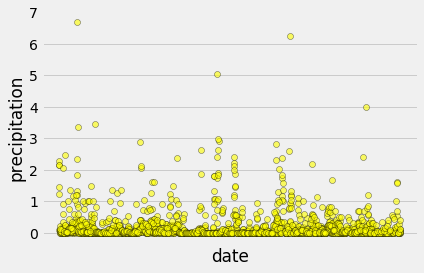

In [449]:
precipData = pd.read_sql('SELECT prcp, date from measurement where date > "2016-08-23"', conn)

#precipData[precipData.date > '2016-08-23']


precipData = precipData.dropna()
thePrcpY = precipData.prcp
theDateX = precipData.date

theDateX


datePrecip = plt.scatter(theDateX, thePrcpY, color="yellow", label="Precipitation", alpha=".6", edgecolors= "black")
plt.xlabel("date")
plt.ylabel("precipitation")
plt.xticks([], [])
datePrecip

![precipitation](Images/precipitation.png)

In [404]:
dateIndex = precipData.set_index('date')
dateIndexNoNa = dateIndex.dropna()
dateIndexNoNa.head()

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


In [405]:
dateIndexNoNa.count()
dateIndexNoNa.mean()
dateIndexNoNa.std()
dateIndexNoNa.min()
check = dateIndexNoNa.quantile([.25, .50, .75])
dateIndexNoNa.max()

statsDF = {
    'count':dateIndexNoNa.count(),
    'mean':dateIndexNoNa.mean(),
    'std':dateIndexNoNa.std(),
    'min':dateIndexNoNa.min(),
    '25%':check.prcp[0.25],
    '50%':check.prcp[0.50],
    '75%':check.prcp[0.75],
    'max':dateIndexNoNa.max()
}
pd.DataFrame(statsDF)



,count,mean,std,min,25%,50%,75%,max
prcp,2015,0.176462,0.460288,0.0,0.0,0.02,0.13,6.7


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [406]:
# Design a query to show how many stations are available in this dataset?
measurementStationNum = pd.read_sql('SELECT station FROM measurement', conn)
measurementStationNum
stationStationNum = pd.read_sql('SELECT station FROM station', conn)
stationStationNum

newDF = pd.concat([measurementStationNum, stationStationNum])
uniqueStations = len(newDF['station'].unique())
uniqueStations

9

In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [407]:
#list(measurementStationNum.groupby('station'))

stationCounts = pd.read_sql('SELECT station, COUNT(station) FROM measurement GROUP BY measurement.station ORDER BY COUNT(station) DESC', conn)

stationCounts

,station,COUNT(station)
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


[(54.0, 85.0, 71.66378066378067)]

In [408]:
tempMin = pd.read_sql('SELECT min(tobs) FROM measurement', conn)
tempMin

tempMax = pd.read_sql('SELECT max(tobs) FROM measurement', conn)
tempMax

tempAvg = pd.read_sql('SELECT avg(tobs) FROM measurement', conn)
tempAvg

minMaxAvg = {
    'min':[tempMin],
    'max':[tempAvg],
    'avg':[tempAvg]
}
minMaxAvgDF = pd.DataFrame(minMaxAvg)
minMaxAvgDF



,min,max,avg
0,min(tobs) 0 53.0,avg(tobs) 0 73.097954,avg(tobs) 0 73.097954


In [1]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

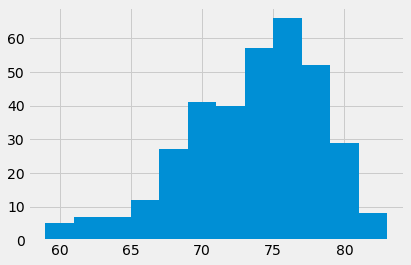

In [409]:
obsData = pd.read_sql('SELECT tobs FROM measurement WHERE station == "USC00519281" AND date > "2016-08-23"', conn)
obsData
obsDataHisto = plt.hist(obsData['tobs'], bins=12)

In [16]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


<IPython.core.display.Javascript object>


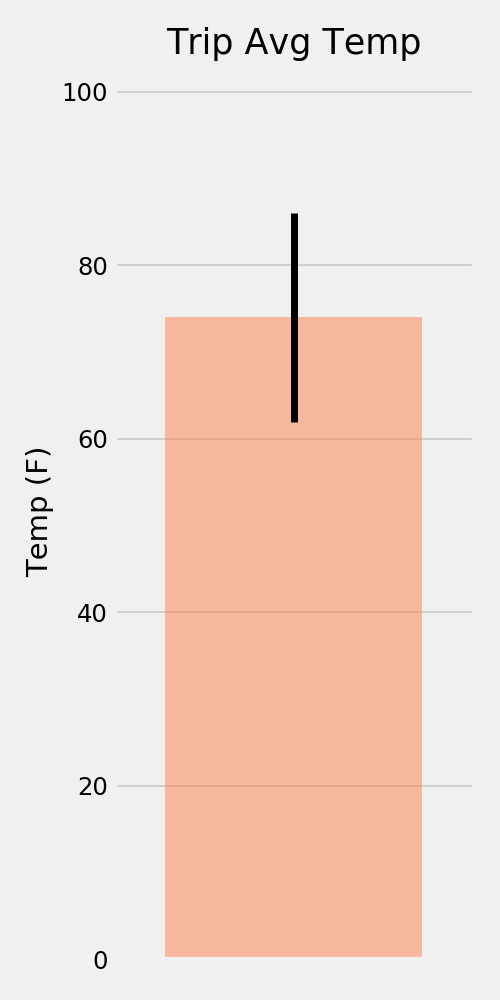

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


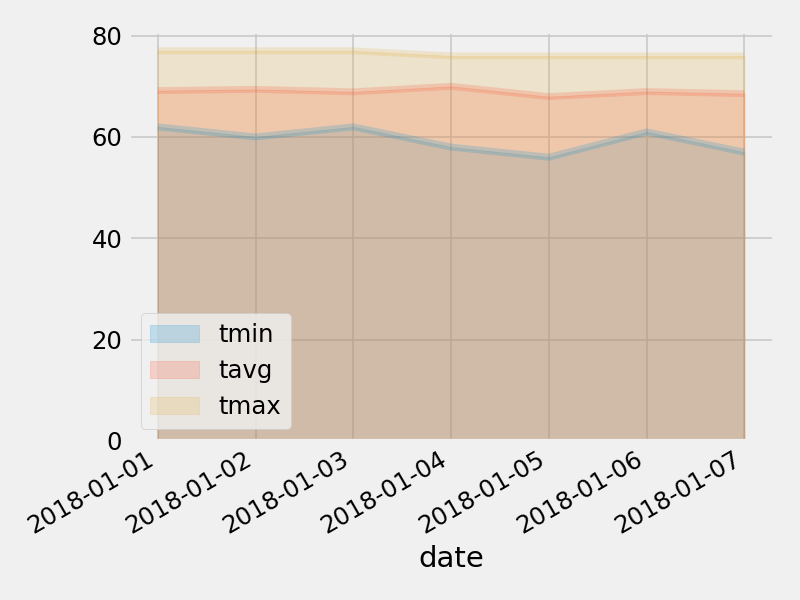

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
